In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('population1.csv',encoding='ISO-8859-1')

In [23]:
df

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,389",-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,"3,470",-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
231,232,Tokelau,"2,506",4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,"1,819",0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


### Check for missing values and handle them appropriately..

In [3]:
df.isnull().sum()

Rank                 0
Country              0
Population (2024)    0
Yearly Change        0
Net Change           0
Density (P/KmÂ²)     0
Land Area (KmÂ²)     0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          0
World Share          0
dtype: int64

### Identify duplicate records and remove them.

In [4]:
df=df.drop_duplicates()

In [5]:
df

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,389",-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,"3,470",-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
231,232,Tokelau,"2,506",4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,"1,819",0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


### Convert population values into millions for better readability.


In [5]:
df.columns=df.columns.str.strip()
d={'Rank':'rank',
   'Country':'country',
   'Population (2024)':'population',
   'Yearly Change':'yr_change',
   'Net Change':'net_change',
   'Density (P/KmÂ²)':'density',
   'Land Area (KmÂ²)':'land_area',
   'Migrants (net)':'migrants',
   'Fert. Rate':'fertility',
   'Med. Age':'mid_age',
   'Urban Pop %':'urban_pop',
   'World Share':'world_share'}
df.rename(columns=d,inplace=True)


In [6]:
df.columns

Index(['rank', 'country', 'population', 'yr_change', 'net_change', 'density',
       'land_area', 'migrants', 'fertility', 'mid_age', 'urban_pop',
       'world_share'],
      dtype='object')

In [7]:
df.dtypes

rank             int64
country         object
population      object
yr_change       object
net_change      object
density         object
land_area       object
migrants        object
fertility      float64
mid_age          int64
urban_pop       object
world_share     object
dtype: object

In [8]:
df.drop(["density","land_area","migrants","fertility","mid_age","urban_pop"],axis=1)

,rank,country,population,yr_change,net_change,world_share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",3.08 %
...,...,...,...,...,...,...
229,230,Montserrat,"4,389",-0.70 %,-31,0.00 %
230,231,Falkland Islands,"3,470",-0.20 %,-7,0.00 %
231,232,Tokelau,"2,506",4.55 %,109,0.00 %
232,233,Niue,"1,819",0.11 %,2,0.00 %


In [9]:
df['population'] = df['population'].str.replace(',', '')
df['population']=df['population'].fillna(0).astype('int64')

In [11]:
df.dtypes

rank             int64
country         object
population       int64
yr_change       object
net_change      object
density         object
land_area       object
migrants        object
fertility      float64
mid_age          int64
urban_pop       object
world_share     object
dtype: object

### Convert population values into millions for better readability.


In [10]:
df['population']=df['population']/1000000

In [13]:
df

,rank,country,population,yr_change,net_change,density,land_area,migrants,fertility,mid_age,urban_pop,world_share
0,1,India,1450.935791,0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,1419.321278,-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,345.426571,0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,283.487931,0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,251.269164,1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,0.004389,-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,0.003470,-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
231,232,Tokelau,0.002506,4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,0.001819,0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [11]:
df_new=df.drop(["density","land_area","migrants","fertility","mid_age","urban_pop"],axis=1)
df_new

,rank,country,population,yr_change,net_change,world_share
0,1,India,1450.935791,0.89 %,"12,866,195",17.78 %
1,2,China,1419.321278,-0.23 %,"-3,263,655",17.39 %
2,3,United States,345.426571,0.57 %,"1,949,236",4.23 %
3,4,Indonesia,283.487931,0.82 %,"2,297,864",3.47 %
4,5,Pakistan,251.269164,1.52 %,"3,764,669",3.08 %
...,...,...,...,...,...,...
229,230,Montserrat,0.004389,-0.70 %,-31,0.00 %
230,231,Falkland Islands,0.003470,-0.20 %,-7,0.00 %
231,232,Tokelau,0.002506,4.55 %,109,0.00 %
232,233,Niue,0.001819,0.11 %,2,0.00 %


In [43]:
df_new

,rank,country,population,yr_change,net_change,world_share
0,1,India,1450.935791,0.89 %,"12,866,195",17.78 %
1,2,China,1419.321278,-0.23 %,"-3,263,655",17.39 %
2,3,United States,345.426571,0.57 %,"1,949,236",4.23 %
3,4,Indonesia,283.487931,0.82 %,"2,297,864",3.47 %
4,5,Pakistan,251.269164,1.52 %,"3,764,669",3.08 %
...,...,...,...,...,...,...
229,230,Montserrat,0.004389,-0.70 %,-31,0.00 %
230,231,Falkland Islands,0.003470,-0.20 %,-7,0.00 %
231,232,Tokelau,0.002506,4.55 %,109,0.00 %
232,233,Niue,0.001819,0.11 %,2,0.00 %


### Which top 10 countries have the highest population in the latest year?


In [12]:
df_new.head(10)

,rank,country,population,yr_change,net_change,world_share
0,1,India,1450.935791,0.89 %,"12,866,195",17.78 %
1,2,China,1419.321278,-0.23 %,"-3,263,655",17.39 %
2,3,United States,345.426571,0.57 %,"1,949,236",4.23 %
3,4,Indonesia,283.487931,0.82 %,"2,297,864",3.47 %
4,5,Pakistan,251.269164,1.52 %,"3,764,669",3.08 %
5,6,Nigeria,232.679478,2.10 %,"4,796,533",2.85 %
6,7,Brazil,211.998573,0.41 %,"857,844",2.60 %
7,8,Bangladesh,173.562364,1.22 %,"2,095,374",2.13 %
8,9,Russia,144.820423,-0.43 %,"-620,077",1.77 %
9,10,Ethiopia,132.059767,2.62 %,"3,368,075",1.62 %


### Which countries show negative population growth?

In [13]:
df_new[df_new['yr_change']<'0']

,rank,country,population,yr_change,net_change,world_share
1,2,China,1419.321278,-0.23 %,"-3,263,655",17.39 %
8,9,Russia,144.820423,-0.43 %,"-620,077",1.77 %
11,12,Japan,123.753041,-0.50 %,"-617,906",1.52 %
19,20,Thailand,71.668011,-0.05 %,"-34,424",0.88 %
24,25,Italy,59.342867,-0.26 %,"-156,586",0.73 %
28,29,South Korea,51.717590,-0.06 %,"-31,149",0.63 %
38,39,Poland,38.539201,-0.58 %,"-223,643",0.47 %
50,51,Nepal,29.651054,-0.15 %,"-43,560",0.36 %
59,60,Taiwan,23.213962,-0.44 %,"-103,183",0.28 %
66,67,Romania,19.015088,-0.54 %,"-103,391",0.23 %


### Show the first 10 rows

In [17]:
df_new.head(10)

,rank,country,population,yr_change,net_change,world_share
0,1,India,1450.935791,0.89 %,"12,866,195",17.78 %
1,2,China,1419.321278,-0.23 %,"-3,263,655",17.39 %
2,3,United States,345.426571,0.57 %,"1,949,236",4.23 %
3,4,Indonesia,283.487931,0.82 %,"2,297,864",3.47 %
4,5,Pakistan,251.269164,1.52 %,"3,764,669",3.08 %
5,6,Nigeria,232.679478,2.10 %,"4,796,533",2.85 %
6,7,Brazil,211.998573,0.41 %,"857,844",2.60 %
7,8,Bangladesh,173.562364,1.22 %,"2,095,374",2.13 %
8,9,Russia,144.820423,-0.43 %,"-620,077",1.77 %
9,10,Ethiopia,132.059767,2.62 %,"3,368,075",1.62 %


### Check how many rows and columns are there.

In [52]:
df_new.shape

(234, 6)

### List all column names.

In [14]:
df_new.columns

Index(['rank', 'country', 'population', 'yr_change', 'net_change',
       'world_share'],
      dtype='object')

### Check for missing values in each column..

In [19]:
df_new.isnull().sum()

rank           0
country        0
population     0
yr_change      0
net_change     0
world_share    0
dtype: int64

### Sort data by Country and Year

In [23]:
df_new.groupby("country")['population'].sum()

country
Afghanistan        42.647492
Albania             2.791765
Algeria            46.814308
American Samoa      0.046765
Andorra             0.081938
                     ...    
Wallis & Futuna     0.011277
Western Sahara      0.590506
Yemen              40.583164
Zambia             21.314956
Zimbabwe           16.634373
Name: population, Length: 234, dtype: float64

### Find countries with null population values.

In [30]:
df_new[df_new['population']==0]

,rank,country,population,yr_change,net_change,world_share


### Find the least populated country in each year.

In [31]:
df_new.tail(1)

,rank,country,population,yr_change,net_change,world_share
233,234,Holy See,0.000496,0.00 %,0,0.00 %


### Calculate total world population 

In [34]:
df_new["population"].sum()

np.float64(8160.533423)

### Find the average population per country.

In [36]:
df_new.groupby("country")['population'].mean()

country
Afghanistan        42.647492
Albania             2.791765
Algeria            46.814308
American Samoa      0.046765
Andorra             0.081938
                     ...    
Wallis & Futuna     0.011277
Western Sahara      0.590506
Yemen              40.583164
Zambia             21.314956
Zimbabwe           16.634373
Name: population, Length: 234, dtype: float64

In [15]:
df_new['yr_change']=df_new['yr_change'].str.replace('%','').astype(float)

In [40]:
df_new.dtypes

rank             int64
country         object
population     float64
yr_change      float64
net_change      object
world_share     object
dtype: object

In [16]:
df_new['net_change']=df_new["net_change"].str.replace(",","").astype('int64')

In [17]:
df_new['world_share']=df_new["world_share"].str.replace("%","").astype(float)

In [18]:
df_new.dtypes

rank             int64
country         object
population     float64
yr_change      float64
net_change       int64
world_share    float64
dtype: object

### Top 5 countries by world share.

In [46]:
df_new.groupby("country")["world_share"].sum().sort_values(ascending=False).head(5)

country
India            17.78
China            17.39
United States     4.23
Indonesia         3.47
Pakistan          3.08
Name: world_share, dtype: float64

### Countries with world share > 1%.

In [51]:
df_new[df_new['world_share']>0.01]

,rank,country,population,yr_change,net_change,world_share
0,1,India,1450.935791,0.89,12866195,17.78
1,2,China,1419.321278,-0.23,-3263655,17.39
2,3,United States,345.426571,0.57,1949236,4.23
3,4,Indonesia,283.487931,0.82,2297864,3.47
4,5,Pakistan,251.269164,1.52,3764669,3.08
...,...,...,...,...,...,...
154,155,Timor-Leste,1.400638,1.18,16352,0.02
155,156,Estonia,1.360546,-0.49,-6650,0.02
156,157,Cyprus,1.358282,0.99,13306,0.02
157,158,Mauritius,1.271169,-0.19,-2419,0.02


### Countries with highest net increase.

In [54]:
df_new.groupby("country")['net_change'].sum().sort_values(ascending=False).head(5)

country
India       12866195
Nigeria      4796533
Pakistan     3764669
DR Congo     3486534
Ethiopia     3368075
Name: net_change, dtype: int64

### Which countries together make up 50% of world population?

In [20]:
df_new_sort=df_new.sort_values('population',ascending=False)
df_new_sort["cumulative-share"]=df_new_sort["world_share"].cumsum()
country_com = df_new_sort[df_new_sort['cumulative-share'] <= 50]
country_com[['country','world_share','cumulative-share']]

,country,world_share,cumulative-share
0,India,17.78,17.78
1,China,17.39,35.17
2,United States,4.23,39.40
3,Indonesia,3.47,42.87
4,Pakistan,3.08,45.95
5,Nigeria,2.85,48.80


### Are countries with higher world share growing faster?

In [25]:
df_new.groupby('country')['world_share'].sum().sort_values(ascending=False)

country
India                  17.78
China                  17.39
United States           4.23
Indonesia               3.47
Pakistan                3.08
                       ...  
Tokelau                 0.00
Tuvalu                  0.00
U.S. Virgin Islands     0.00
Wallis & Futuna         0.00
Vanuatu                 0.00
Name: world_share, Length: 234, dtype: float64

### Pie chart of top 10 world share.

<function matplotlib.pyplot.show(close=None, block=None)>

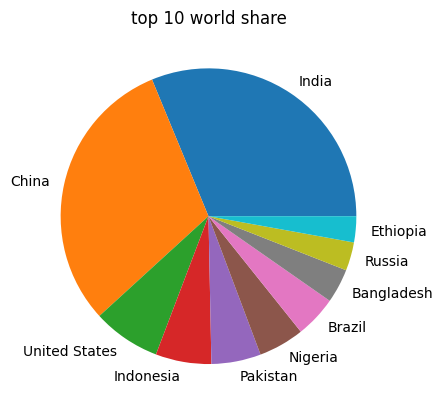

In [35]:
import matplotlib.pyplot as plt
import plotly.express as px
data=df_new.groupby('country')['world_share'].sum().sort_values(ascending=False).head(10)

plt.pie(data,labels=data.index)
plt.title("top 10 world share")
plt.show


### Bar chart of net change for top 10

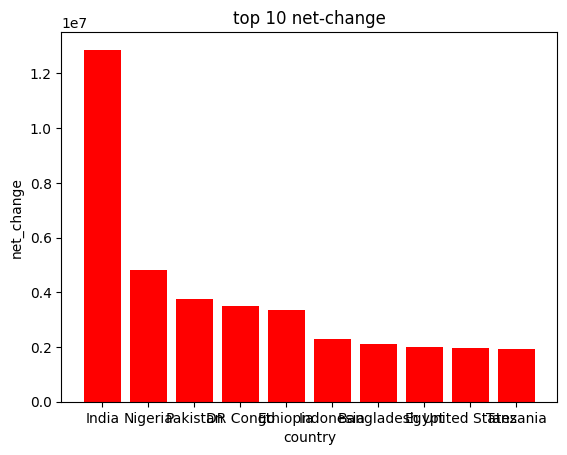

In [38]:
data=df_new.groupby("country")["net_change"].sum().sort_values(ascending=False).head(10)

plt.bar(data.index,data.values,color='r')
plt.xlabel("country")
plt.ylabel("net_change")
plt.title("top 10 net-change")
plt.show()

### Scatter plot: World Share vs Yearly Change.


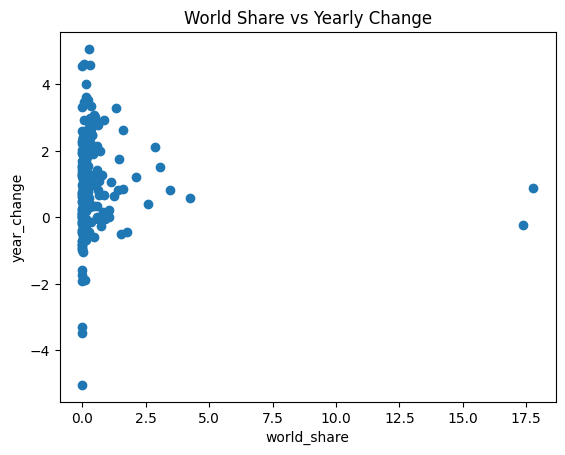

In [44]:

plt.scatter(df_new['world_share'],df_new['yr_change'])

plt.xlabel("world_share")
plt.ylabel("year_change")
plt.title("World Share vs Yearly Change")

plt.show()

### Histogram: World Share distribution

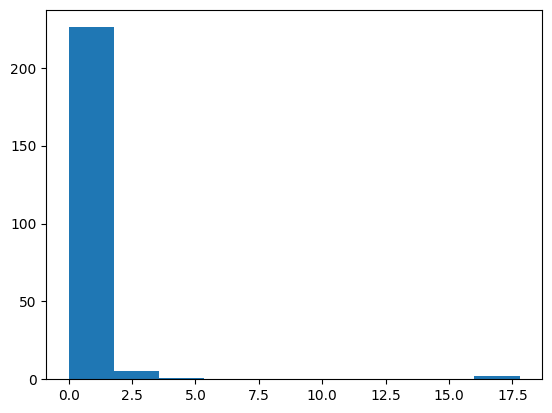

In [45]:
plt.hist(df_new['world_share'])
plt.show()

### Boxplot: Yearly Change.

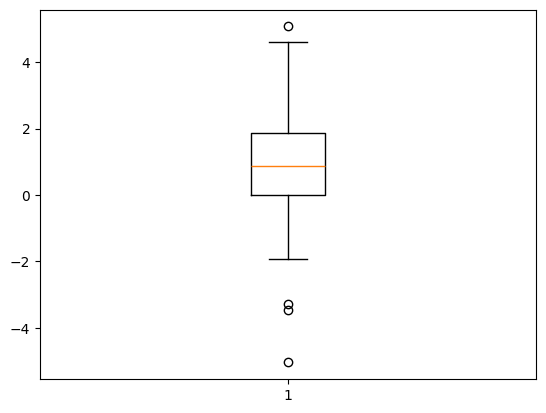

In [46]:
plt.boxplot(df_new['yr_change'])
plt.show()